# <font color=BA4A00>NASA Wildfire Data Visualization</font>

## Executive Summary

We used the NASA Earth Observatory Natural Event Tracker (EONET) API to investigate the number of wildfires occuring around the world. 

**Observations:**
* Most wildfires occur in the northern hemisphere, and in the United States specifically.
* Many wildfires reoccur in the same places year after year. *(Note 1)*
* Most wildfires in the US are caused by humans, but that may not be the case with all wildfires. *(Note 2)*
* Most wildfires occur in the summer months where temperatures are warmer and the air is drier in the northern hemisphere. Is this perhaps also when people are more likely to be out doing things that could cause wildfires (camping, smoking while hiking)?  Also, due to more land mass in northern hemisphere, more fires burn in the summer.

**Limitations:**
* The EONET data collection began in 2015, so there are only a few years of complete data.
* The EONET data pulls from multiple sources but the sources may not be fully representative of worldwide data, thus our data skews towards reporting on United States data.
* The data has no information about the scale or size of the fire nor the economic or environmental impact.


*Note 1:  
Under trends on wildfires, the same areas keep burning.  
https://earthobservatory.nasa.gov/blogs/earthmatters/2018/11/29/6-trends-to-know-about-fire-season-in-the-western-u-s/*


*Note 2:  
In the US, 84% of wildfires have a human cause.  
https://www.pnas.org/content/early/2017/02/21/1617394114  
In British Columbia, Canada, about 40% of wildfires are human cause, and 60% by lightning.  
https://www2.gov.bc.ca/gov/content/safety/wildfire-status/about-bcws/wildfire-response/fire-characteristics/causes*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from pprint import pprint
import seaborn as sns

# This data already has an index column, so set index to [0]
fire_df = pd.read_csv('fire_data.csv', index_col=[0])

In [2]:
temp = fire_df.loc[1454]
temp

ID                                                     EONET_3014
Name of Fire    C11014 - East of Toil Mtn - Quesnel West Fire,...
End Date                                     2017-07-31T00:00:00Z
Event Date                                   2017-07-07T00:00:00Z
Latitude                                               -124.02195
Longitude                                               52.810817
Year                                                         2017
Month                                                           7
Hemisphere                                    Southern Hemisphere
Country                                              Missing Data
Name: 1454, dtype: object

In [3]:
# fixing data for row 1454.  
# Latitude and Longitude were switched, so the hemisphere was wrong and the country was missing.
fire_df.loc[1454, 'Latitude'] = temp[5]
fire_df.loc[1454, 'Longitude'] = temp[4]
fire_df.loc[1454, 'Hemisphere'] = 'Northern Hemisphere'
fire_df.loc[1454, 'Country'] = 'Canada'
fire_df.loc[1454]

ID                                                     EONET_3014
Name of Fire    C11014 - East of Toil Mtn - Quesnel West Fire,...
End Date                                     2017-07-31T00:00:00Z
Event Date                                   2017-07-07T00:00:00Z
Latitude                                                52.810817
Longitude                                              -124.02195
Year                                                         2017
Month                                                           7
Hemisphere                                    Northern Hemisphere
Country                                                    Canada
Name: 1454, dtype: object

In [4]:
fire_df.head()

,ID,Name of Fire,End Date,Event Date,Latitude,Longitude,Year,Month,Hemisphere,Country
0,EONET_5285,Gila Fire,2021-04-13T00:00:00Z,2021-04-02T07:15:00Z,32.91400,-113.43700,2021,4,Northern Hemisphere,United States
1,EONET_5272,King Fire,2021-03-26T00:00:00Z,2021-03-17T15:30:00Z,26.95300,-98.08800,2021,3,Northern Hemisphere,United States
2,EONET_5268,"Wildfires - Patagonia Region, Argentina",2021-03-20T00:00:00Z,2021-03-12T14:42:00Z,-42.59104,-71.38468,2021,3,Southern Hemisphere,Argentina
3,EONET_5267,Big Rocks Fire,2021-04-05T00:00:00Z,2021-03-08T16:30:00Z,37.74000,-115.00100,2021,3,Northern Hemisphere,United States
4,EONET_5263,Wildfire - Curacavi Commune (Fundo Monterrey F...,2021-03-07T00:00:00Z,2021-03-01T18:46:00Z,-33.38700,-71.19793,2021,3,Southern Hemisphere,Chile


### Fire Events by Country

In [5]:
fireCount_byCountry = pd.DataFrame(fire_df['Country'].value_counts())
fireCount_byCountry.index.name = 'Country'
fireCount_byCountry.columns = ['Number of Fire Events']
fireCount_byCountry

,Number of Fire Events
Country,
United States,1381
Canada,273
Chile,101
Australia,37
España,22
Portugal,11
Ελλάς,9
Schweiz/Suisse/Svizzera/Svizra,9
France,7


In [6]:
fire_data_top_countries = fire_df.groupby('Country').count()
fire_data_top_countries_sorted = fire_data_top_countries.sort_values('Year', ascending = False)
# fire_data_top_countries_sorted.head()

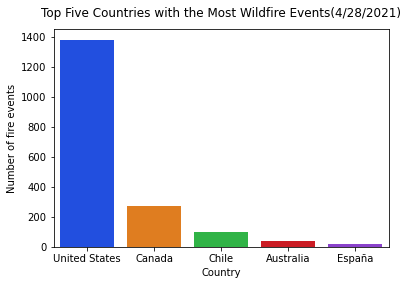

In [7]:
# graph of top five countries, since the range of fire events by country is so wide
# data appears to be biased towards the US

top_countries = sns.barplot(x = 'Country', y = 'ID', data = fire_data_top_countries_sorted.reset_index().head(), 
                            palette='bright')
top_countries.set_title("Top Five Countries with the Most Wildfire Events(4/28/2021)", y=1.03)
top_countries.set(xlabel="Country", ylabel="Number of fire events");
plt.savefig('Top_Five_Countries.png')

#### Interesting note about above data by country:
Although China and Russia are larger countries by land mass, there does not seem to be many wildfires.  Is this due to under reporting, data gathering bias, better land management, or a combination of these reasons?

### Fire Events by Hemisphere

In [8]:
fireBy_hemi = pd.DataFrame(fire_df['Hemisphere'].value_counts())
fireBy_hemi.index.name = ''
fireBy_hemi.columns = ['Number of Fire Events']
fireBy_hemi

,Number of Fire Events
,
Northern Hemisphere,1773
Southern Hemisphere,171


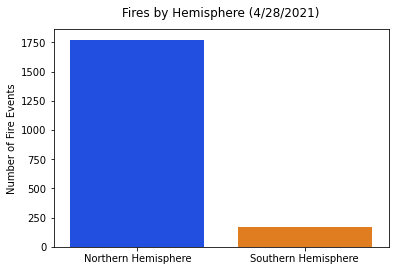

In [9]:
fire_hemisphere = sns.barplot(x = '', y = 'Number of Fire Events', data = fireBy_hemi.reset_index(), 
                             palette = 'bright')
fire_hemisphere.set_title("Fires by Hemisphere (4/28/2021)", y=1.03);
plt.savefig('Fires_by_Hemisphere.png')

### Fire Events by Year

In [10]:
fireBy_year = pd.DataFrame(fire_df['Year'].value_counts())
fireBy_year.index.name = 'Year'
fireBy_year.columns = ['Number of Fire Events']
fireBy_year.sort_values(['Year'], inplace=True)
fireBy_year

,Number of Fire Events
Year,
2003,1
2005,2
2007,1
2014,1
2015,159
2016,218
2017,420
2018,392
2019,294


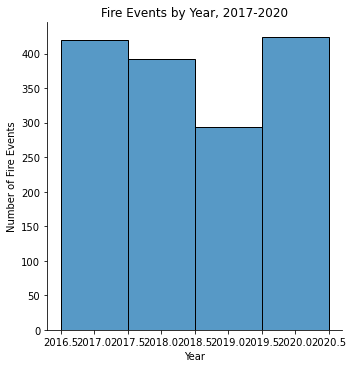

In [11]:
fire_data_4years = fire_df[fire_df['Year'].isin([2017, 2018, 2019, 2020])]

sns.displot(x='Year', data = fire_data_4years, discrete=True, palette = 'bright')
plt.title('Fire Events by Year, 2017-2020')
plt.ylabel('Number of Fire Events')
plt.savefig('Fire_Events_Year.png')
plt.show()

In [12]:
avg_firesbyYear = fire_data_4years.count()/4
print(fire_data_4years['Year'].mode())
print(avg_firesbyYear)
fire_df['Year'].mode()  # the most fires occurred in 2020

0    2020
dtype: int64
ID              382.5
Name of Fire    382.5
End Date        382.5
Event Date      382.5
Latitude        382.5
Longitude       382.5
Year            382.5
Month           382.5
Hemisphere      382.5
Country         382.5
dtype: float64


0    2020
dtype: int64

### Fire Events by Month

In [13]:
fireBy_month = pd.DataFrame(fire_df['Month'].value_counts())
fireBy_month.index.name = "Month"
fireBy_month.columns = ['Number of Fire Events']
fireBy_month.sort_values(['Month'], inplace=True)
fireBy_month

,Number of Fire Events
Month,
1,45
2,51
3,45
4,59
5,117
6,265
7,477
8,537
9,164


In [14]:
fire_df['Month'].agg(['mean', 'median', 'std'])

mean      7.078704
median    7.000000
std       2.104936
Name: Month, dtype: float64

### Fires by Month

On average, July has the most wildfire events.   Most wildfire events occur between May and September.

In [15]:
fire_df['Month'].mode()

0    8
dtype: int64

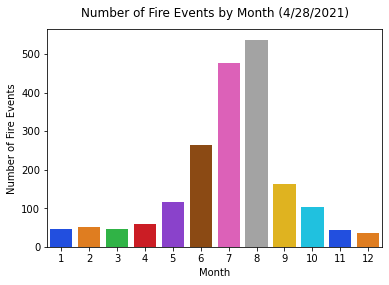

In [16]:
fires_by_month = sns.barplot(x = 'Month', y = 'Number of Fire Events', data = fireBy_month.reset_index(), 
                             palette='bright')
fires_by_month.set_title("Number of Fire Events by Month (4/28/2021)", y=1.03)
plt.savefig('Fires_by_Month.png')
plt.show()

In [17]:
# filtered the data to only show the years with the most complete data
# data collection started in 2015 and it is unknown if the the 2015 and 2016 data is complete
# all years before 2015 are incomplete
# 2021 was excluded as the year is ongoing
fire_data_4years = fire_df[fire_df['Year'].isin([2017, 2018, 2019, 2020])]
fire_data_4years

,ID,Name of Fire,End Date,Event Date,Latitude,Longitude,Year,Month,Hemisphere,Country
32,EONET_5188,"Wildfire - San Diego County (Creek Fire), Cali...",2020-12-30T00:00:00Z,2020-12-24T15:26:00Z,33.420010,-117.255290,2020,12,Northern Hemisphere,United States
33,EONET_5187,Wildfire - San Bernardino County (Duncan Fire)...,2020-12-30T00:00:00Z,2020-12-24T15:15:00Z,34.198710,-117.463790,2020,12,Northern Hemisphere,United States
34,EONET_5185,Wildfire - Valparaiso Commune (Lake Penuelas F...,2020-12-22T00:00:00Z,2020-12-16T16:19:00Z,-33.052350,-71.611570,2020,12,Southern Hemisphere,Chile
35,EONET_5186,"Wildfire - Quilpue Commune (La Fragua Fire), C...",2020-12-22T00:00:00Z,2020-12-16T16:15:00Z,-33.120220,-71.470910,2020,12,Southern Hemisphere,Chile
36,EONET_5175,Wildfires - Olmue Commune (La Bodeguilla Fire)...,2020-12-10T00:00:00Z,2020-12-04T16:44:00Z,-33.007740,-71.183120,2020,12,Southern Hemisphere,Chile
...,...,...,...,...,...,...,...,...,...,...
1557,EONET_2732,"Rael Fire, NEW MEXICO",2017-03-08T00:00:00Z,2017-03-02T11:30:00Z,33.800000,-108.339444,2017,3,Northern Hemisphere,United States
1558,EONET_2723,"Wildfire - Christchurch, New Zealand",2017-02-16T00:00:00Z,2017-02-13T00:00:00Z,-43.573740,172.397490,2017,2,Southern Hemisphere,New Zealand / Aotearoa
1559,EONET_2722,"Wildfire - N of Mudgee, New South Wales - Aust...",2017-02-14T00:00:00Z,2017-02-12T19:00:00Z,-32.297351,149.855134,2017,2,Southern Hemisphere,Australia
1560,EONET_2706,"Hopper Fire, TEXAS",2017-01-25T00:00:00Z,2017-01-22T11:00:00Z,26.982222,-98.136667,2017,1,Northern Hemisphere,United States


In [18]:
# fire events by month from the 4 year data
fire_event_count = fire_data_4years.groupby('Month')['Year'].count()
fire2 = pd.DataFrame(fire_data_4years.groupby(['Year','Month'])['ID'].count())
fire2


ID
Year Month     
2017 1        2
     2        2
     3        6
     4        7
     5       14
     6       56
     7      153
     8      123
     9       26
     10      25
     11       1
     12       5
2018 1        3
     2        2
     3        3
     4       17
     5       37
     6       57
     7      138
     8      103
     9       20
     10       7
     11       4
     12       1
2019 1        1
     2       12
     3       17
     4       11
     5       27
     6       36
     7       56
     8       52
     9       22
     10      32
     11      12
     12      16
2020 1       17
     2       22
     3       12
     4        9
     5       17
     6       49
     7       51
     8      132
     9       71
     10      23
     11      11
     12      10

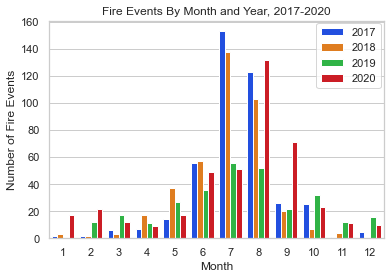

In [19]:
# Graph the fires by year and month
sns.set_style("whitegrid")
sns.set_palette('bright')
sns.set_context("notebook")
fireBy_Month_Year = sns.barplot(x='Month', y='ID', data=fire2.reset_index(), hue='Year', palette = 'bright')
fireBy_Month_Year.set_title('Fire Events By Month and Year, 2017-2020')
fireBy_Month_Year.set(ylabel = 'Number of Fire Events')
plt.legend(bbox_to_anchor=(.99, .99), borderaxespad=0)
plt.savefig('Fire_Month_and_Year.png')
plt.show()

## Fire Events by Coordinates

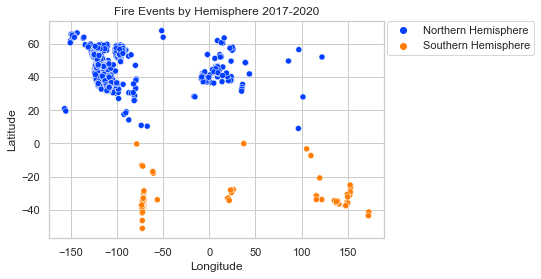

In [20]:
sns.set_style("whitegrid")
sns.set_palette('bright')
sns.set_context("notebook")
sns.scatterplot(x='Longitude', y='Latitude', data=fire_data_4years, hue='Hemisphere', palette = 'bright')
plt.title('Fire Events by Hemisphere 2017-2020')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0);
plt.savefig('Fire_Map.png')
# if you notice the number of fires start to take the shape of the western coast of the US for the Northern Hemisphere

In [21]:
# No useful visualization from this
#sns.set_style("whitegrid")
#sns.set_palette('bright')
#sns.set_context("notebook")
#sns.scatterplot(x='Longitude', y='Latitude', data=fire_data_4years, hue='Year', palette = 'bright')
#plt.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0);

In [22]:
# No useful visualization from this
#sns.set_style("whitegrid")
#sns.set_palette('bright')
#sns.set_context("notebook")
#sns.scatterplot(x='Longitude', y='Latitude', data=fire_data_4years, hue='Month', palette = 'bright')
#plt.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

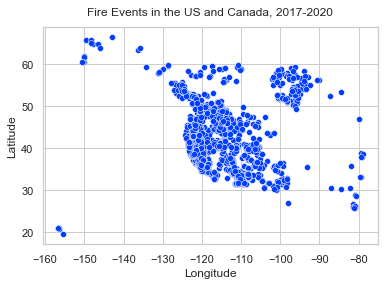

In [23]:
sns.set_style("whitegrid")
sns.set_palette('bright')
sns.set_context("notebook")
fires_inUSC = fire_data_4years[fire_data_4years['Country'].isin(['United States', 'Canada'])]
sns.scatterplot(x='Longitude', y='Latitude', data=fires_inUSC, palette = 'bright')
plt.title('Fire Events in the US and Canada, 2017-2020', y=1.03);
plt.savefig('Fire_Map_USC.png')